# General notebook for testing purpose

Dashboard: https://developer.riotgames.com/  
Region endpoints: https://developer.riotgames.com/regional-endpoints.html  
Full reference: https://developer.riotgames.com/api-methods/

## Imports
### General imports

In [52]:
import sys
import pandas as pd

%matplotlib inline
import matplotlib
matplotlib.style.use("ggplot")

### Specific imports

In [114]:
repo_path = "D:\Documents\GitHub\league-of-legends"

if not repo_path in sys.path:
    sys.path.append(repo_path)
    
import lib_plots; lib_plots = reload(lib_plots)
import lib_api; lib_api = reload(lib_api)
import lib_custom; lib_custom = reload(lib_custom)

## Parameters & API key

In [92]:
region = "euw1"
summoner_name = "Cyrlop"
api_key = "RGAPI-f9fbf09c-17b8-48e4-8cdb-ea6ef58a1057"
summoner_names = ["Cyrlop", "Helluin", "leag"]

In [112]:
api_works = lib_api.test_api_key(api_key)

API request successful


## Summoners

In [94]:
json_summ_list = [lib_api.get_summoner_data(region, summoner_name, api_key) for summoner_name in summoner_names]

In [95]:
df_summoners = pd.DataFrame(json_summ_list).set_index("name")
df_summoners

,accountId,id,profileIconId,revisionDate,summonerLevel
name,,,,,
Cyrlop,29238184,24732627,3226,1520031474000,65
Helluin,21603599,376152,19,1520014077000,60
leaG,239556,233829,661,1495764755000,30


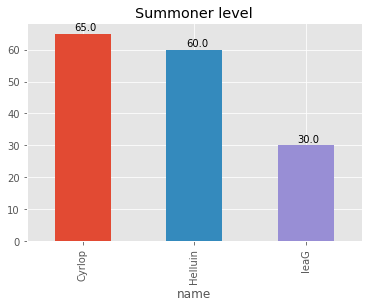

In [115]:
ax = df_summoners["summonerLevel"].plot.bar(title="Summoner level")
ax = lib_plots.label_bars(ax, perc=False)
ax

## Leagues

In [97]:
json_league_list = [lib_api.get_summoner_league(summoner_id, region, api_key) for summoner_id in df_summoners["id"]]

In [98]:
leagues = []
for l in json_league_list:
    for e in l:
        leagues.append(e)
df_leagues = pd.DataFrame(leagues).set_index(["playerOrTeamName","queueType"])
df_leagues["ratio"] = (df_leagues["wins"]/(df_leagues["losses"]+df_leagues["wins"]))*100
df_leagues["ratio"] = df_leagues["ratio"].apply(round, ndigits=2)
df_leagues

,,freshBlood,hotStreak,inactive,leagueId,leagueName,leaguePoints,losses,playerOrTeamId,rank,tier,veteran,wins,ratio
playerOrTeamName,queueType,,,,,,,,,,,,,
Cyrlop,RANKED_SOLO_5x5,False,True,False,98fcdbf0-fc9e-11e7-972b-c81f66dacb22,Zed's Spellswords,80,48,24732627,IV,GOLD,False,48,50.00
Helluin,RANKED_SOLO_5x5,False,False,False,adf0deb0-fa93-11e7-964f-c81f66dd0e0d,Trundle's Spellswords,0,75,376152,I,GOLD,True,76,50.33


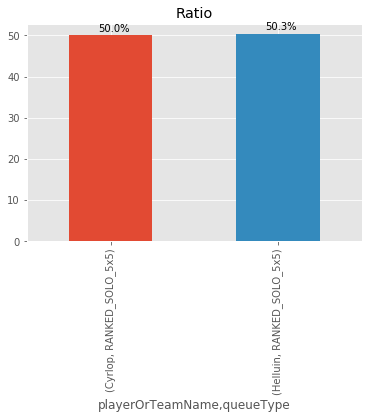

In [116]:
ax = df_leagues["ratio"].plot.bar(title="Ratio")
ax = lib_plots.label_bars(ax, perc=True)
ax

## Start testing theory: Pseudo syntax

### Get as much data as possible

In [ ]:
# TODO
# Try with random player IDs?
# Function to store the data in a Json file
# Only query data I don't already have

### Rank all pseudos

In [111]:
print lib_custom.rate_pseudo("Cyrlop")
print lib_custom.rate_pseudo("Cyrlop06")
print lib_custom.rate_pseudo("cyrlop06")
print lib_custom.rate_pseudo("xX_cyrlop06_Xx")    

1
0.5
0.25
0.140625


### Check if higher ranked pseudo win more

In [ ]:
# TODO